In [2]:
#Importing library and thir function
from pydub import AudioSegment
from pydub.silence import split_on_silence
from pydub.playback import play
from pydub.effects import normalize
from vscode_audio import Audio
import matplotlib.pyplot as plt
import noisereduce as nr
import librosa as lr
import librosa.display as lrd
import numpy as np
import time

In [3]:
def waveshow(y, sr):
    plt.figure(figsize=(14, 5))
    lrd.waveshow(y, sr=sr)
    plt.show()

In [4]:
audioFile = '../Datasets/SUBESCO/F_01_OISHI_S_1_FEAR_1.wav'

In [17]:
original_sound = AudioSegment.from_wav(audioFile)
augged_sound = normalize(original_sound, headroom=5.0)
# n = np.array(augged_sound.get_array_of_samples(), dtype=np.float32)
# n = lr.effects.trim(n, top_db=25)[0]
# augged_sound = AudioSegment(
#     # raw audio data (bytes)
#     data=n.tobytes(),

#     # 2 byte (16 bit) samples
#     sample_width=2,

#     # 44.1 kHz frame rate
#     frame_rate=16000,

#     # stereo
#     channels=1
# )

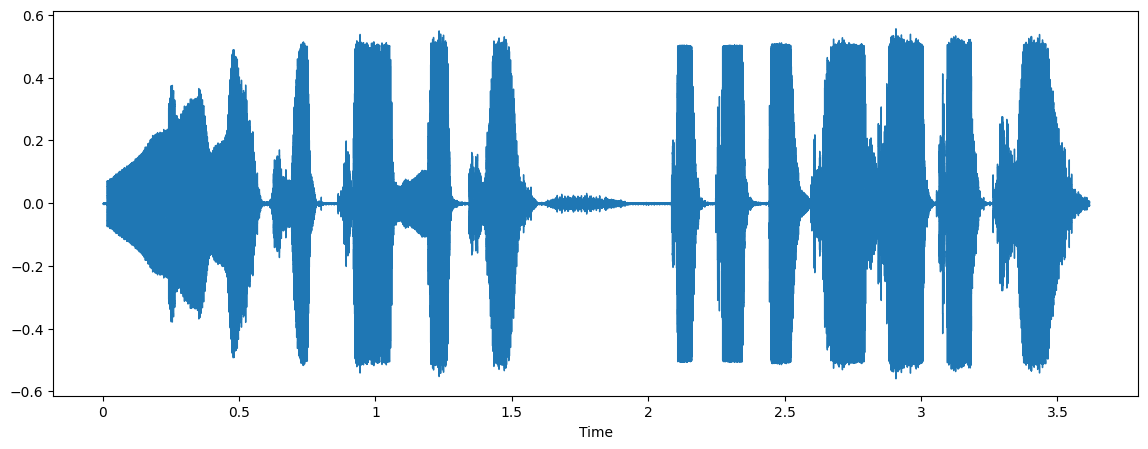

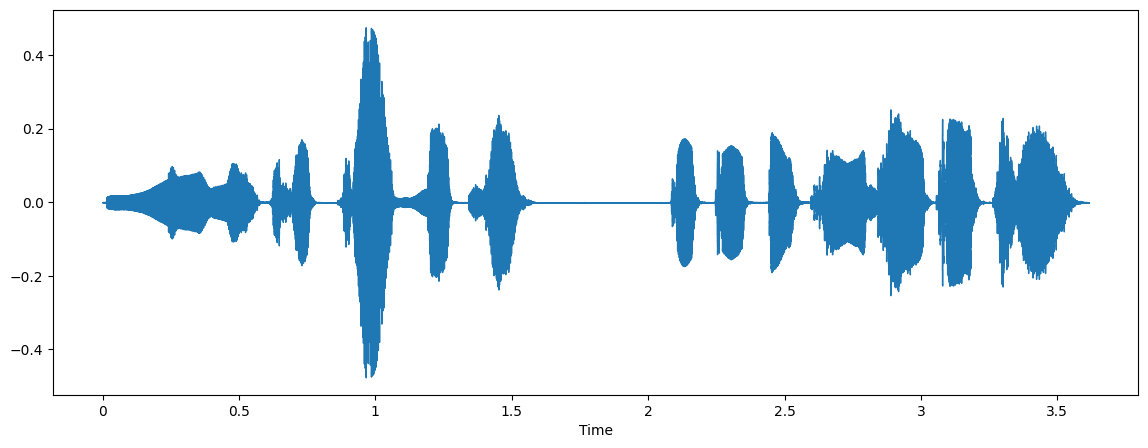

In [9]:
y, sr = lr.load(audioFile, sr=16000)
y = lr.effects.trim(y, top_db=25)[0]
y_n = nr.reduce_noise(y, sr=sr)
waveshow(y, sr)
waveshow(y_n, sr)
Audio(y, sr, False)
Audio(y_n, sr, False)

In [18]:
audio_chunks = split_on_silence(augged_sound, min_silence_len=20, silence_thresh=augged_sound.dBFS-16)

In [19]:
len(audio_chunks)

10

In [21]:
print("Playing original...")
play(original_sound)
# print("Playing modified...")
# play(augged_sound)
for i, chunk in enumerate(audio_chunks):
    print("Playing chunk{0}".format(i))
    play(chunk)
    # time.sleep(.5)
#    output_file = "./test/chunk{0}.wav".format(i)
#    print("Exporting file", output_file)
#    chunk.export(output_file, format="wav")

Playing original...
Playing chunk0
Playing chunk1
Playing chunk2
Playing chunk3
Playing chunk4
Playing chunk5
Playing chunk6
Playing chunk7
Playing chunk8
Playing chunk9
